Điểm ngưỡng: 165
<class 'numpy.ndarray'>


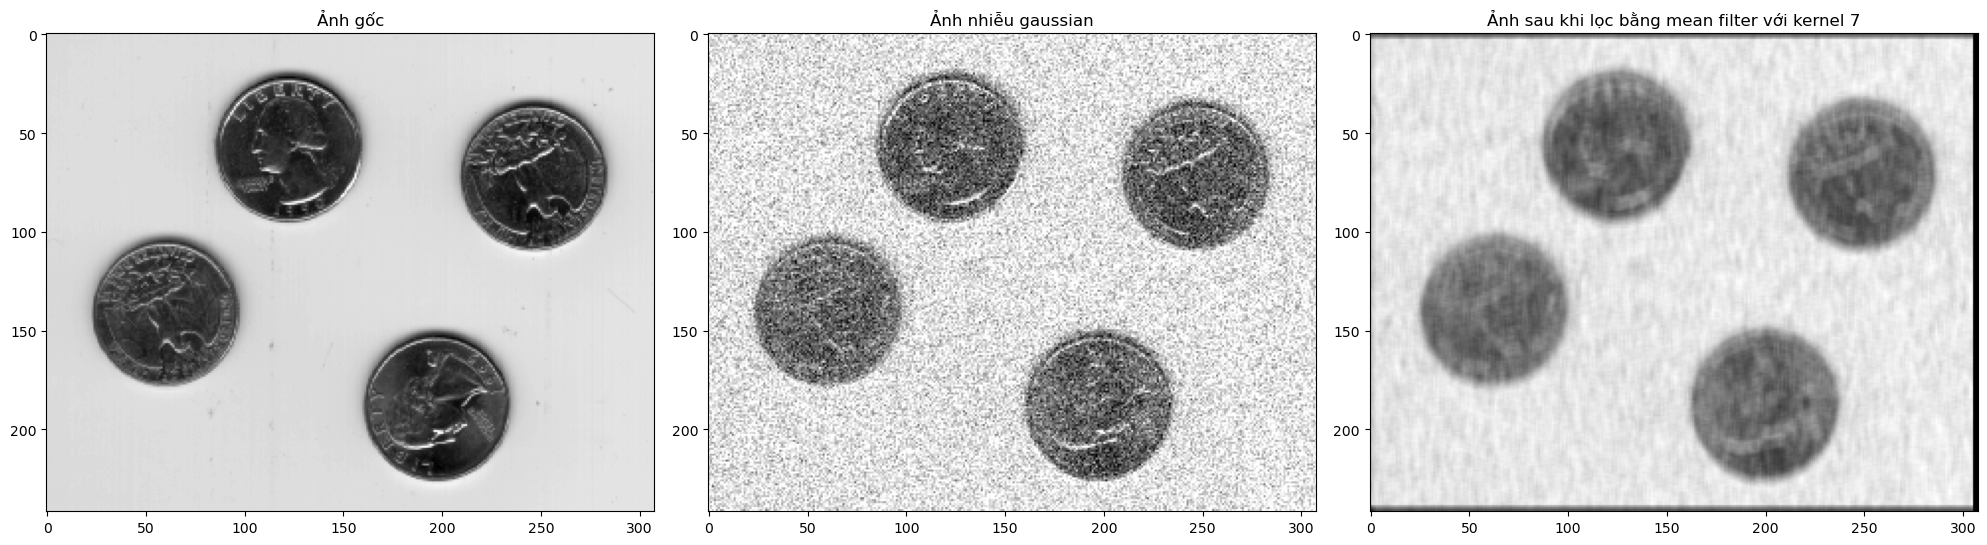

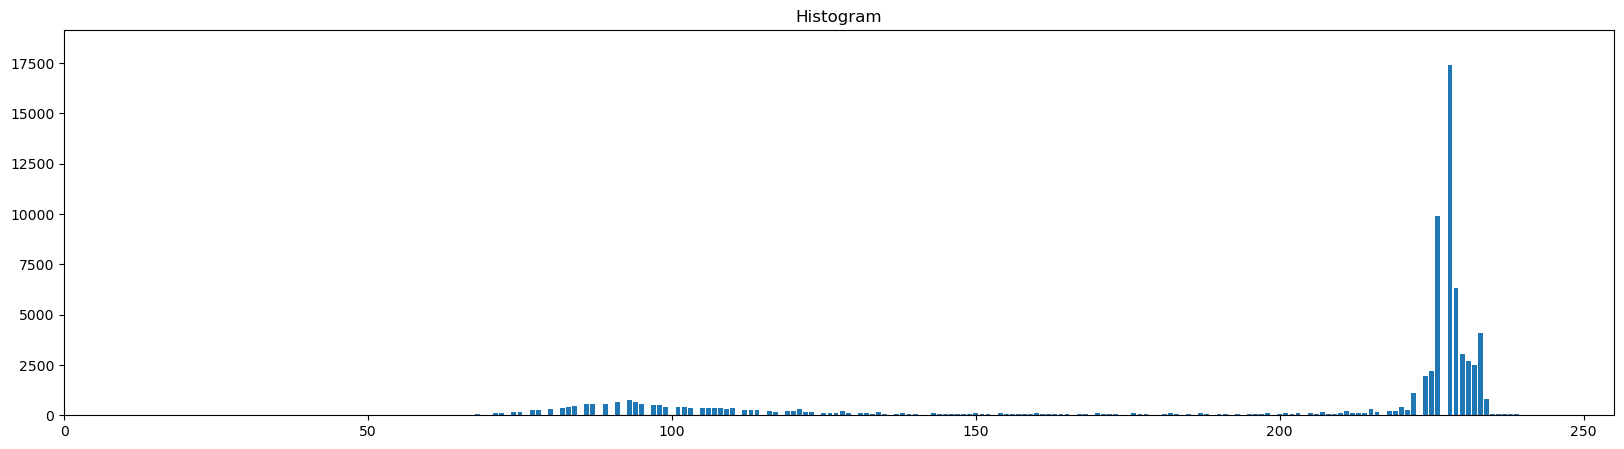

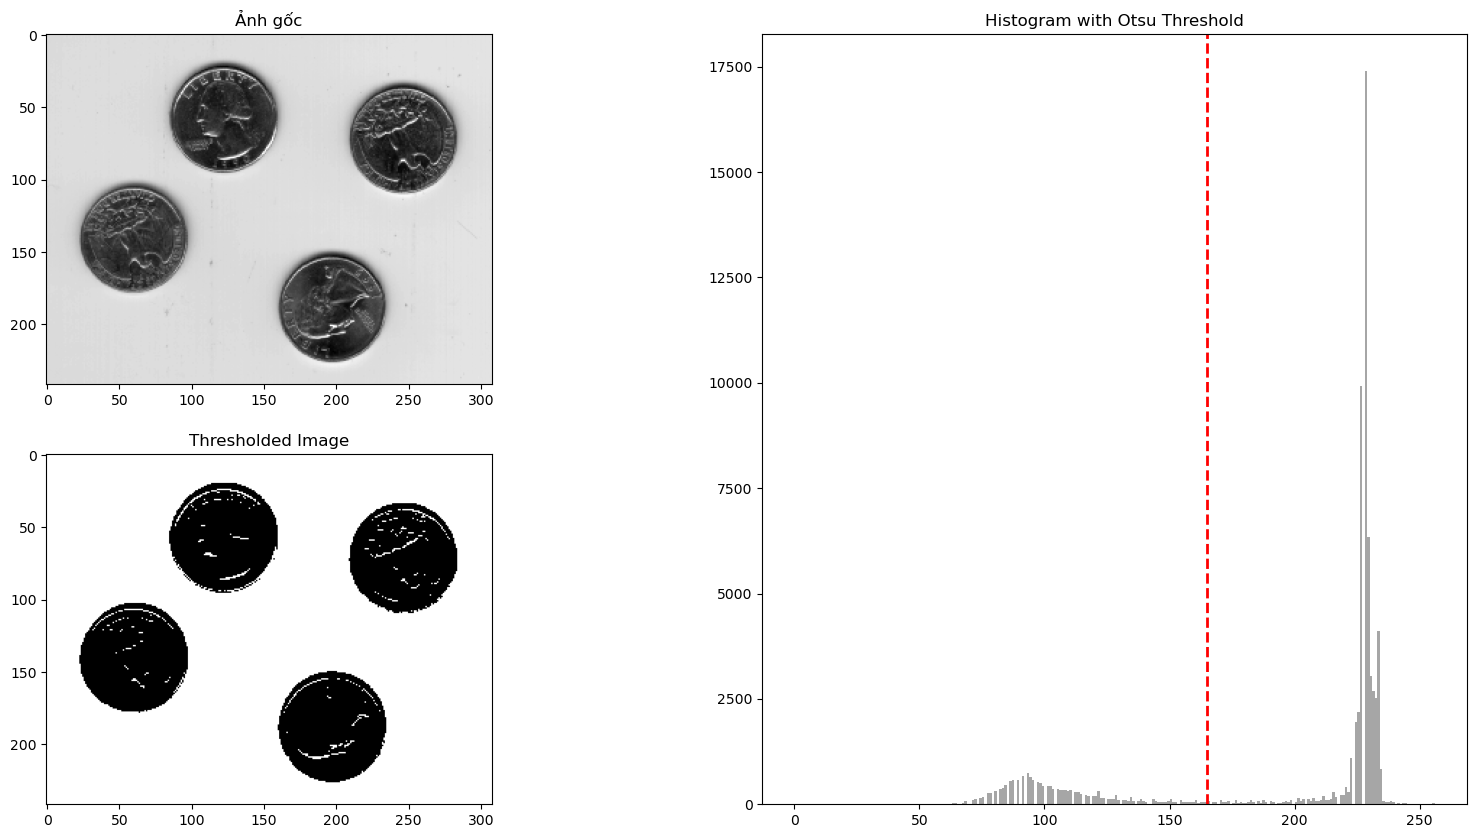

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
from skimage import exposure
from skimage.filters import threshold_otsu

def mean_filter(data, kernel_size):
 temp = []
 kernel_halfsize = kernel_size // 2
 data_final = []
 data_final = np.zeros((len(data),len(data[0])))
 for i in range(len(data)): 
     for j in range(len(data[0])): 
         for z in range(kernel_size):
             if (i + z - kernel_halfsize < 0) or (i + z - kernel_halfsize > len(data) - 1): 
                 for c in range(kernel_size):
                     temp.append(0)
             else: 
                 if (j + z - kernel_halfsize < 0) or (j + kernel_halfsize > len(data[0]) - 1):
                     temp.append(0)
                 else: 
                     for k in range(kernel_halfsize):
                         temp.append(data[i + z - kernel_halfsize][j + k - kernel_halfsize])
         data_final[i][j] = np.mean(temp)
         temp = []
 return data_final

def histogram(ax, img, title):  
 pixels=[]
 counts=[0]*256
 for x in range(256):
     pixels.append(x)

 for h in range(len(img)):
        for w in range(len(img[0])):
             counts[img[h, w]] +=1
 ax.bar(pixels,counts)
 ax.set_title(title)
 ax.set_xlim([min(pixels), max(pixels)])
 ax.set_ylim([0, max(counts) * 1.1])

def otsu_threshold(img):
    img_flat = img.flatten()

    otsu_thresh = threshold_otsu(img_flat)

    return otsu_thresh

def apply_threshold(img, threshold):
    thresholded_img = img[:, :] > threshold

    return thresholded_img

def plot_images(original_img, thresholded_img, threshold_value):
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(img_arr, cmap='gray')
    plt.title("Ảnh gốc")

    plt.subplot(2, 2, 3)
    plt.imshow(thresholded_img, cmap='gray')
    plt.title('Thresholded Image')
    
    plt.subplot(1, 2, 2)
    plt.hist(original_img.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    plt.axvline(x=threshold_value, color='red', linestyle='dashed', linewidth=2)
    plt.title('Histogram with Otsu Threshold')
    
img = Image.open('coins.tif')
img_arr = np.array(img)

plt.figure(figsize=(20, 10))

plt.subplot(1,3,1)
plt.imshow(img_arr, cmap='gray')
plt.title('Ảnh gốc')

#them nhieu gaussian vao anh
gauss_img = random_noise(img_arr, mode='gaussian', mean=0, var=0.02)
plt.subplot(1,3,2)
plt.imshow(gauss_img, cmap='gray')
plt.title('Ảnh nhiễu gaussian')

#loc anh nhieu s&p bang median filter
remove_sp_noise = mean_filter(gauss_img, 7)
plt.subplot(1,3,3)
plt.imshow(remove_sp_noise, cmap='gray')
plt.title('Ảnh sau khi lọc bằng mean filter với kernel 7')

plt.tight_layout()

fig, axs = plt.subplots(1, 1, figsize=(20, 5))

histogram(axs, img_arr, 'Histogram')

#tim diem nguong
otsu_threshold_value = otsu_threshold(img_arr)
print('Điểm ngưỡng: {}'.format(otsu_threshold_value))

#ap dung diem nguong de tach nen va vat
thresholded_img = apply_threshold(img_arr, otsu_threshold_value)
#ve cac hinh anh va bieu do
plot_images(img_arr, thresholded_img, otsu_threshold_value)